# Employees working in ABC company.

 #### <font color='blue'>Importing the libraries and the data

In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
dataset=pd.read_csv('myexcel.csv')

####   <font color='blue'> Changing the height to a valid random number between 100 and 190

In [300]:
h_list=list()
for i in range(0,458):
    h=random.randint(100,190)
    h_list.append(h)
dataset['Height']=h_list
dataset

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,132,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,133,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,112,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,116,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,112,231,NaN,5000000.0
...,...,...,...,...,...,...,...,...,...
453,Shelvin Mack,Utah Jazz,8,PG,26,119,203,Butler,2433333.0
454,Raul Neto,Utah Jazz,25,PG,24,157,179,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21,C,26,158,256,NaN,2900000.0
456,Jeff Withey,Utah Jazz,24,C,26,104,231,Kansas,947276.0


### 1. How many are there in each Team and the percentage splitting with respect to the total employees.

In [302]:
team_count=dataset['Team'].value_counts()
team_count

Team
New Orleans Pelicans      19
Memphis Grizzlies         18
Utah Jazz                 16
New York Knicks           16
Milwaukee Bucks           16
Brooklyn Nets             15
Portland Trail Blazers    15
Oklahoma City Thunder     15
Denver Nuggets            15
Washington Wizards        15
Miami Heat                15
Charlotte Hornets         15
Atlanta Hawks             15
San Antonio Spurs         15
Houston Rockets           15
Boston Celtics            15
Indiana Pacers            15
Detroit Pistons           15
Cleveland Cavaliers       15
Chicago Bulls             15
Sacramento Kings          15
Phoenix Suns              15
Los Angeles Lakers        15
Los Angeles Clippers      15
Golden State Warriors     15
Toronto Raptors           15
Philadelphia 76ers        15
Dallas Mavericks          15
Orlando Magic             14
Minnesota Timberwolves    14
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x245eef8e050>,
 [Text(1.0906712405452337, 0.14295539530749113, 'New Orleans Pelicans'),
  Text(1.019839414049628, 0.4122227183828075, 'Memphis Grizzlies'),
  Text(0.8969609869248204, 0.6367581863901338, 'Utah Jazz'),
  Text(0.7367909850200335, 0.8167858008028844, 'New York Knicks'),
  Text(0.5412645323354455, 0.9576182465031103, 'Milwaukee Bucks'),
  Text(0.32697627040644, 1.0502792574316102, 'Brooklyn Nets'),
  Text(0.10547204515386335, 1.094931800474834, 'Portland Trail Blazers'),
  Text(-0.12048274924374588, 1.0933818670229851, 'Oklahoma City Thunder'),
  Text(-0.3413535727606285, 1.0456948591073567, 'Denver Nuggets'),
  Text(-0.54782041201553, 0.9538830096920351, 'Washington Wizards'),
  Text(-0.7311710538061768, 0.8218204731423799, 'Miami Heat'),
  Text(-0.8836687114998165, 0.6550798488094823, 'Charlotte Hornets'),
  Text(-0.9988784916701299, 0.46069703589105765, 'Atlanta Hawks'),
  Text(-1.0719389251753735, 0.24687434191074853, 'San Antonio Spurs')

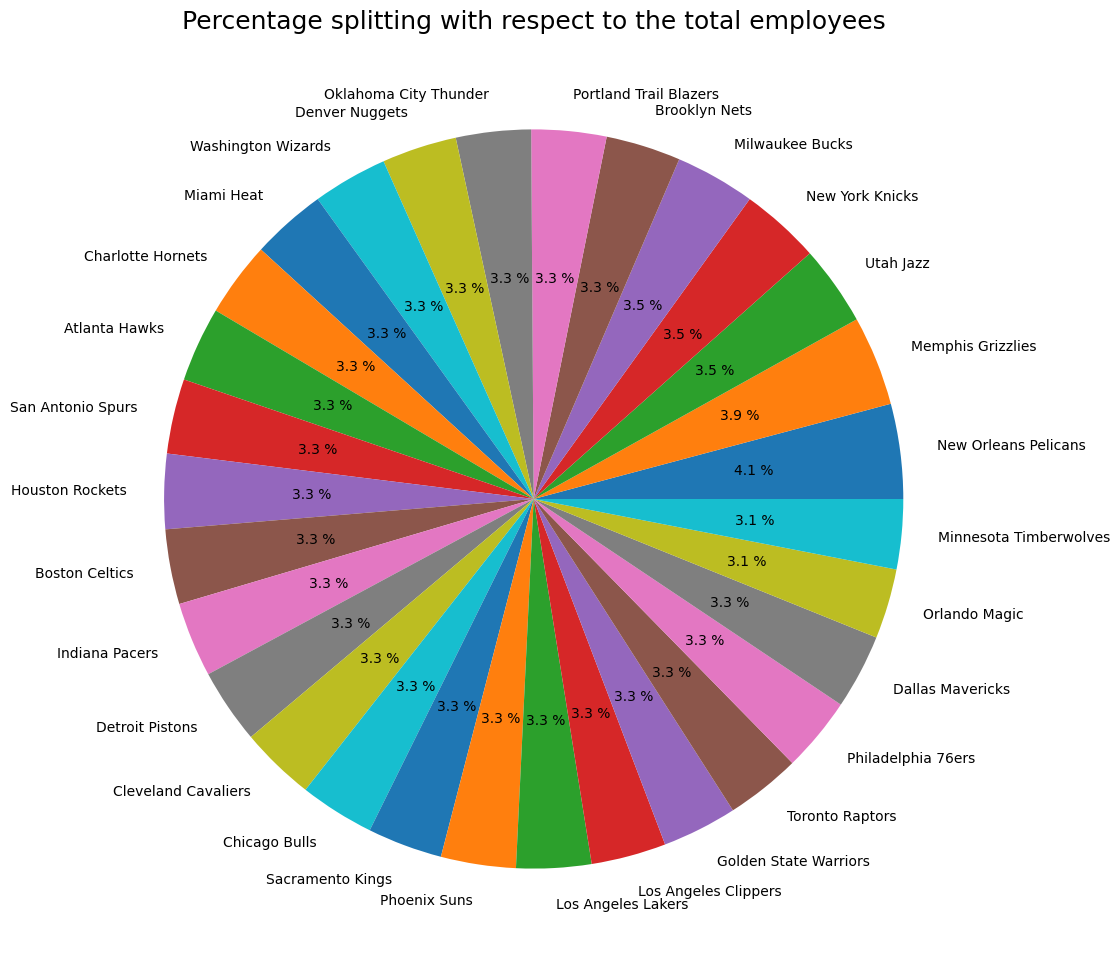

In [226]:
np.sum(team_count)
label=team_count.index
plt.figure(figsize=(16,12))
plt.title('Percentage splitting with respect to the total employees',size=18)
plt.pie(team_count,labels=label,autopct='%.1f %%')

###  2. Segregate the employees w.r.t different positions.

In [214]:
pos=dataset['Position'].value_counts()
positions=pos.index
sg=dataset['Name'][dataset.Position=='SG'].tolist()
pf=dataset['Name'][dataset.Position=='PF'].tolist()
pg=dataset['Name'][dataset.Position=='PG'].tolist()
sf=dataset['Name'][dataset.Position=='SF'].tolist()
c=dataset['Name'][dataset.Position=='C'].tolist()
df=pd.DataFrame({'SG':pd.Series(sg),'PF':pd.Series(pf),'PG':pd.Series(pg),'SF':pd.Series(sf),'C':pd.Series(c)})
df

,SG,PF,PG,SF,C
0,John Holland,Jonas Jerebko,Avery Bradley,Jae Crowder,Kelly Olynyk
1,R.J. Hunter,Amir Johnson,Terry Rozier,Thanasis Antetokounmpo,Jared Sullinger
2,Evan Turner,Jordan Mickey,Marcus Smart,Carmelo Anthony,Tyler Zeller
3,James Young,Chris McCullough,Isaiah Thomas,Cleanthony Early,Brook Lopez
4,Bojan Bogdanovic,Willie Reed,Jarrett Jack,Lance Thomas,Henry Sims
...,...,...,...,...,...
97,Gerald Henderson,Trevor Booker,NaN,NaN,NaN
98,C.J. McCollum,Derrick Favors,NaN,NaN,NaN
99,Luis Montero,Trey Lyles,NaN,NaN,NaN
100,Alec Burks,NaN,NaN,NaN,NaN


###  3. Find from which age group most of the employees belong to.

In [33]:
age=dataset['Age'].value_counts()
ind=age.head(1).index
print("Most of the employees are ",ind[0],"years old.")

Most of the employees are  24 years old.


###  4. Find out under which team and position, spending in terms of salary is high.

In [23]:
salary=dataset[['Team','Salary']].value_counts()
name=salary.index.get_level_values(0)
salary=salary.index.get_level_values(1)*salary.values
t_sal=pd.DataFrame(salary,index=name)
name=np.unique(name)
sal=list()
for i in name:
    sal.append(t_sal.loc[i].sum().values)
team_salary={'name':name,'salary':sal}
team_salary_df=pd.DataFrame(team_salary)

team_salary_df.sort_values(by='salary',ascending=False)


,name,salary
5,Cleveland Cavaliers,[106988689.0]
12,Los Angeles Clippers,[94854640.0]
20,Oklahoma City Thunder,[93765298.0]
9,Golden State Warriors,[88868997.0]
4,Chicago Bulls,[86783378.0]
26,San Antonio Spurs,[84442733.0]
18,New Orleans Pelicans,[82750774.0]
15,Miami Heat,[82515673.0]
3,Charlotte Hornets,[78340920.0]
14,Memphis Grizzlies,[76550880.0]


In [276]:
max=team_salary_df.loc[team_salary_df['salary']==team_salary_df.salary.max()[0]].name.values
print("Team ",max," is spending high in terms of salary")

Team  ['Cleveland Cavaliers']  is spending high in terms of salary


In [285]:
salary=dataset[['Team','Position','Salary']].value_counts()
team=salary.index.get_level_values(0)
pos=salary.index.get_level_values(1)
team_pos_salary=pd.DataFrame(pos,columns=["Position"],index=[team])
team_pos_salary['Salary']=salary.index.get_level_values(2)*salary.values
max_pos=team_pos_salary.loc[max].sort_values(by='Salary',ascending=False)
max_pos

,Position,Salary
Team,,
Cleveland Cavaliers,SF,22970500.0
Cleveland Cavaliers,PF,19689000.0
Cleveland Cavaliers,PG,16407501.0
Cleveland Cavaliers,C,14260870.0
Cleveland Cavaliers,SG,8988765.0
Cleveland Cavaliers,PF,8193029.0
Cleveland Cavaliers,SG,5000000.0
Cleveland Cavaliers,C,4950000.0
Cleveland Cavaliers,PG,2100000.0


In [299]:
print("In team ",max," Position ",max_pos.head(1).Position.values," gets high amount of salary")

In team  ['Cleveland Cavaliers']  Position  ['SF']  gets high amount of salary


In [50]:
position=dataset[['Position','Salary']].value_counts()
name=position.index.get_level_values(0)
salary=position.index.get_level_values(1)*position.values
pos_sal=pd.DataFrame(salary,index=name)
uname=np.unique(name)
pos=list()
for i in name:
    pos.append(pos_sal.loc[i].sum().values)
pos_salary={'name':name,'salary':salary}
pos_salary_df=pd.DataFrame(pos_salary)
h_team_sal_df=pos_salary_df.sort_values(by='salary',ascending=False)
h_team_sal_df

,name,salary
32,C,39378000.0
20,PF,39378000.0
33,C,32815000.0
28,SG,32815000.0
37,PG,27000000.0
...,...,...
157,SG,111196.0
109,C,83397.0
353,PG,55722.0
158,SG,55722.0


In [284]:
print("In general the position ",h_team_sal_df.loc[h_team_sal_df['salary']==h_team_sal_df.salary.max()].name.values," gets high amount of salary")

In general the position  ['C' 'PF']  gets high amount of salary


### 5. Find if there is any correlation between age and salary , represent it visually.

In [217]:
correlation=dataset.Age.corr(dataset.Salary)
print("The correlation number between Age and Salary is:",correlation)
print("The correlation number is nearer to 1; hence Age and Salary are in Positive correlation")

The correlation number between Age and Salary is: 0.2140094122657097
The correlation number is nearer to 1; hence Age and Salary are in Positive correlation


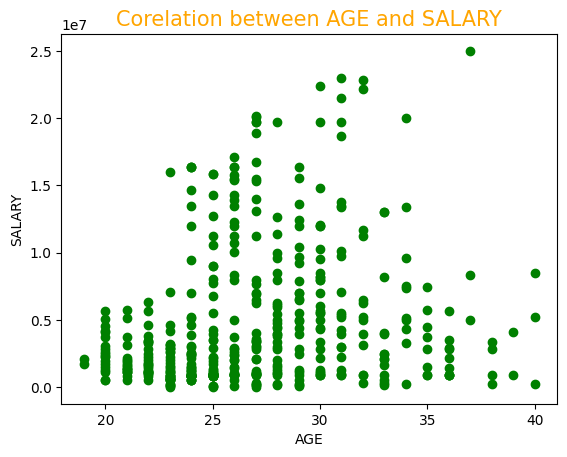

In [218]:
plt.title("Corelation between AGE and SALARY",color='orange',size=15)
plt.xlabel('AGE')
plt.ylabel('SALARY')
plt.scatter(dataset.Age,dataset.Salary,color='green')